<img 
src="https://upload.wikimedia.org/wikipedia/en/e/e4/NHL_Logo_former.svg" alt="NHL logo" width="100"/>

<div align="center">

# 2023 Regular Season NHL Player Analysis
    By Henry McKinney
### | Spring 2023 |
</div>


### Cell 1: Import the Python libraries to incorporate standaradized and reusable code instead of writing it anew

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Cell 2: Use the <font color = purple>**.concat**</font> method to combine the csv files  downloaded from
<font color = orange>**https://www.nhl.com/stats/skaters?reportType=season&seasonFrom=20222023&seasonTo=20222023&gameType=2&filter=gamesPlayed,gte,1&sort=points,goals,assists&page=0&pageSize=100**</font> 
### into one single dataframe

In [2]:
df = pd.concat(map(pd.read_csv, ["NHL23_RS_Top100.csv", "NHL23_RS_Top200.csv", "NHL23_RS_Top300.csv", "NHL23_RS_Top400.csv", "NHL23_RS_Top500.csv", "NHL23_RS_Top600.csv", "NHL23_RS_Top700.csv", "NHL23_RS_Top800.csv", "NHL23_RS_Top900.csv", "NHL23_RS_Top1000.csv",]), 
                                 ignore_index = True)

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

df.head(10)

,Player,Season,Team,S/C,Pos,GP,G,A,P,+/-,...,PPG,PPP,SHG,SHP,OTG,GWG,S,S%,TOI/GP,FOW%
0,Connor McDavid,20222023,EDM,L,C,82,64,89,153,22,...,21,71,4,7,2,11,352,18.2,22:23,51.9
1,Leon Draisaitl,20222023,EDM,L,C,80,52,76,128,7,...,32,62,1,2,1,11,247,21.1,21:44,54.9
2,David Pastrnak,20222023,BOS,R,R,82,61,52,113,34,...,18,37,0,0,4,13,407,15.0,19:34,42.1
3,Nikita Kucherov,20222023,TBL,L,R,82,30,83,113,-2,...,8,50,0,0,0,4,271,11.1,20:08,100
4,Nathan MacKinnon,20222023,COL,R,C,71,42,69,111,29,...,12,34,0,0,2,9,366,11.5,22:19,44.4
5,Jason Robertson,20222023,DAL,L,L,82,46,63,109,37,...,13,41,0,0,1,7,313,14.7,18:50,0
6,Matthew Tkachuk,20222023,FLA,L,L,79,40,69,109,29,...,14,36,0,1,0,6,322,12.4,20:26,44.8
7,Mikko Rantanen,20222023,COL,L,R,82,55,50,105,15,...,13,37,0,0,3,9,306,18.0,22:13,49
8,Ryan Nugent-Hopkins,20222023,EDM,L,C,82,37,67,104,12,...,15,53,1,4,0,3,201,18.4,19:48,45.2
9,Elias Pettersson,20222023,VAN,L,C,80,39,63,102,16,...,6,25,5,9,3,6,257,15.2,20:33,44.3


### Cell 3.0: Count the length of the rows. 

In [3]:
print(len(df))

951


### Cell 3.1: Then, print how the dataframe is structured, e.g., column numbers, which columns contain NaNs (aka Null values) and the data type.

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  951 non-null    object 
 1   Season  951 non-null    int64  
 2   Team    951 non-null    object 
 3   S/C     951 non-null    object 
 4   Pos     951 non-null    object 
 5   GP      951 non-null    int64  
 6   G       951 non-null    int64  
 7   A       951 non-null    int64  
 8   P       951 non-null    int64  
 9   +/-     951 non-null    int64  
 10  PIM     951 non-null    int64  
 11  P/GP    951 non-null    float64
 12  EVG     951 non-null    int64  
 13  EVP     951 non-null    int64  
 14  PPG     951 non-null    int64  
 15  PPP     951 non-null    int64  
 16  SHG     951 non-null    int64  
 17  SHP     951 non-null    int64  
 18  OTG     951 non-null    int64  
 19  GWG     951 non-null    int64  
 20  S       951 non-null    int64  
 21  S%      951 non-null    object 
 22  TO

### Cell 4: To improve the quality of the dataset, I removed players with less than 32 games played. This helps to reduce outliers and makes our analysis more reliable.

In [18]:
# Filter the DataFrame to include only players with at least 32 games played
df_filtered = df[df["GP"] >= 32]

# Display the first 5 rows of the new DataFrame
df_filtered.head(10)

,Player,Season,Team,S/C,Pos,GP,G,A,P,+/-,...,PPG,PPP,SHG,SHP,OTG,GWG,S,S%,TOI/GP,FOW%
0,Connor McDavid,20222023,EDM,L,C,82,64,89,153,22,...,21,71,4,7,2,11,352,18.2,22:23,51.9
1,Leon Draisaitl,20222023,EDM,L,C,80,52,76,128,7,...,32,62,1,2,1,11,247,21.1,21:44,54.9
2,David Pastrnak,20222023,BOS,R,R,82,61,52,113,34,...,18,37,0,0,4,13,407,15.0,19:34,42.1
3,Nikita Kucherov,20222023,TBL,L,R,82,30,83,113,-2,...,8,50,0,0,0,4,271,11.1,20:08,100.0
4,Nathan MacKinnon,20222023,COL,R,C,71,42,69,111,29,...,12,34,0,0,2,9,366,11.5,22:19,44.4
5,Jason Robertson,20222023,DAL,L,L,82,46,63,109,37,...,13,41,0,0,1,7,313,14.7,18:50,0.0
6,Matthew Tkachuk,20222023,FLA,L,L,79,40,69,109,29,...,14,36,0,1,0,6,322,12.4,20:26,44.8
7,Mikko Rantanen,20222023,COL,L,R,82,55,50,105,15,...,13,37,0,0,3,9,306,18.0,22:13,49.0
8,Ryan Nugent-Hopkins,20222023,EDM,L,C,82,37,67,104,12,...,15,53,1,4,0,3,201,18.4,19:48,45.2
9,Elias Pettersson,20222023,VAN,L,C,80,39,63,102,16,...,6,25,5,9,3,6,257,15.2,20:33,44.3


### Cell 4.1: Count the length of the rows of the new combo dataframe as a sanity check. 

In [6]:
print(len(df_filtered))

647


### Let us commence the analysis!

### Cell 5: Goals vs. Shooting Percentage vs. Shots Taken

### In the figure, zoom in to see stats better. I would suggest clicking pan (4 arrow thing) and navigating across the X axis to take a look at player groupings in goal increments of 10 to more easily digest the data.


In [27]:
import plotly.graph_objects as go
import pandas as pd

# using DataFrame as "df_filtered"

# Convert 'S%' column to a numeric type
df_filtered.loc[:, 'S%'] = pd.to_numeric(df_filtered['S%'], errors='coerce')

# Create a scatter plot
fig = go.Figure(data=[go.Scatter(
    x=df_filtered['G'],
    y=df_filtered['S'],
    mode='markers',
    marker=dict(
        size=df_filtered['S%'],
        sizemode='diameter',
        sizeref=0.1,
        color='blue',
        opacity=0.8
    ),
    text=df_filtered['Player'],
    hovertemplate=
    "<b>%{text}</b><br><br>" +
    "Goals: %{x}<br>" +
    "Shots: %{y}<br>" +
    "Shooting Percentage: %{marker.size}<br>"
)])

# Customize axis labels and the plot's title
fig.update_layout(
    xaxis_title='Goals',
    yaxis_title='Shots',
    title='Goals vs. Shots vs. Shooting Percentage',
    showlegend=False
)

# Show the plot
fig.show()


### Cell 6: Faceoffs Taken vs. Faceoff Win Percentage




Statistics for Faceoff Win Percentage:

           Mean Median  Mode  Range Standard Deviation
FOW%  42.267517   45.9  50.0  100.0          15.666228


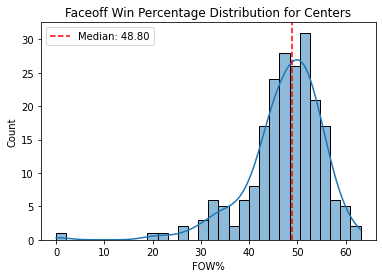

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate statistics for "FOW%"
columns_2 = ["FOW%"]
stats_2 = pd.DataFrame(columns=["Mean", "Median", "Mode", "Range", "Standard Deviation"], index=columns_2)

for col in columns_2:
    stats_2.loc[col] = [df_filtered[col].mean(), df_filtered[col].median(), df_filtered[col].mode().iloc[0], df_filtered[col].max() - df_filtered[col].min(), df_filtered[col].std()]

print("\nStatistics for Faceoff Win Percentage:\n")
print(stats_2)

# Filter rows whose "Pos" column has the value "C" and visualize "FOW%" distribution
df_filtered_c = df_filtered[df_filtered["Pos"] == "C"]
sns.histplot(df_filtered_c["FOW%"], kde=True, bins=30)

# Add a vertical line representing the median of the "FOW%" column
median_fow = df_filtered_c["FOW%"].median()
plt.axvline(median_fow, color='red', linestyle='--', label=f'Median: {median_fow:.2f}')

plt.title("Faceoff Win Percentage Distribution for Centers")
plt.legend()
plt.show()


### Cell 7: Points Distribution and Ice Time and Plus-Minus



In [29]:
# Select the desired columns
df_points_ice_pm = df_filtered[['Player', 'Team', 'P', 'TOI/GP', '+/-']]

# Display the first few rows of the DataFrame
df_points_ice_pm.head(100)




,Player,Team,P,TOI/GP,+/-
0,Connor McDavid,EDM,153,22:23,22
1,Leon Draisaitl,EDM,128,21:44,7
2,David Pastrnak,BOS,113,19:34,34
3,Nikita Kucherov,TBL,113,20:08,-2
4,Nathan MacKinnon,COL,111,22:19,29
5,Jason Robertson,DAL,109,18:50,37
6,Matthew Tkachuk,FLA,109,20:26,29
7,Mikko Rantanen,COL,105,22:13,15
8,Ryan Nugent-Hopkins,EDM,104,19:48,12
9,Elias Pettersson,VAN,102,20:33,16


In [30]:
import plotly.graph_objects as go

#using dataFrame as "df_filtered"

if not df_filtered.empty:
    # Create a 3D scatter plot
    fig = go.Figure(data=[go.Scatter3d(
        x=df_filtered['P'],
        y=df_filtered['TOI/GP'],
        z=df_filtered['+/-'],
        mode='markers',
        marker=dict(
            size=6,
            color=df_filtered['+/-'],  # Set color to "+/-" value
            colorscale='Viridis',  # Choose a colorscale
            opacity=0.8
        ),
        text=df_filtered['Player'],
        hovertemplate=
        "<b>%{text}</b><br><br>" +
        "Points: %{x}<br>" +
        "TOI/GP: %{y}<br>" +
        "Plus-Minus: %{z}<br>"
    )])

    # Customize axis labels and the plot's title
    fig.update_layout(
        scene=dict(
            xaxis_title='Points',
            yaxis_title='TOI/GP',
            zaxis_title='Plus-Minus'
        ),
        title='Comparing Points, Ice Time, and Plus-Minus',
        showlegend=False
    )

    # Show the plot
    fig.show()
else:
    print("The filtered DataFrame is empty.")


### A more basic look at Points Distribution, Goals vs. shooting percentage, and FOW%


Statistics:
           Mean Median Mode  Range Standard Deviation
P     23.278654   16.0    0    153          24.273424
G      8.671924    5.0    0     64          10.303481
S     86.188223   75.0    0    407          75.026012
S%     8.289382    8.0  0.0  100.0           6.946447
FOW%  40.931283   45.0  0.0  100.0           19.14424


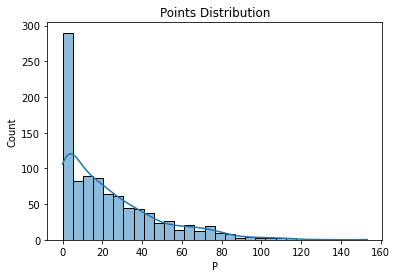

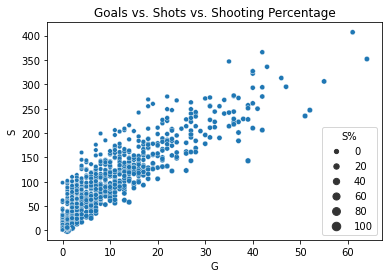

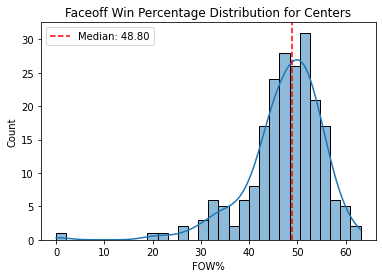

In [33]:
# Set display options
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

# # Display the first 10 rows of the dataset
# print(df.head(10))

# Convert columns to numeric and handle non-numeric values
columns = ["P", "G", "S", "S%", "FOW%"]
for col in columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate mean, median, mode, range, and standard deviation for the specified columns
stats = pd.DataFrame(columns=["Mean", "Median", "Mode", "Range", "Standard Deviation"], index=columns)

for col in columns:
    stats.loc[col] = [df[col].mean(), df[col].median(), df[col].mode().iloc[0], df[col].max() - df[col].min(), df[col].std()]

print("\nStatistics:")
print(stats)

# Plot the distribution of the "P" column
sns.histplot(df["P"], kde=True, bins=30)
plt.title("Points Distribution")
plt.show()

# Create a scatter plot to visualize the relationship between "G", "S", and "S%"
sns.scatterplot(x="G", y="S", size="S%", data=df)
plt.title("Goals vs. Shots vs. Shooting Percentage")
plt.show()

# Filter rows whose "Pos" column has the value "C" and visualize "FOW%" distribution
df_filtered_c = df_filtered[df_filtered["Pos"] == "C"]
sns.histplot(df_filtered_c["FOW%"], kde=True, bins=30)

# Add a vertical line representing the median of the "FOW%" column
median_fow = df_filtered_c["FOW%"].median()
plt.axvline(median_fow, color='red', linestyle='--', label=f'Median: {median_fow:.2f}')

plt.title("Faceoff Win Percentage Distribution for Centers")
plt.legend()
plt.show()

